## Project Motivation  
Although the past decade had witnessed never seen before trades and insane franchise expansions, it has been regarded as one of the most lopsided times in basketball history because of how highly predictable the Finals' matchups were. An unstoppable dynasty from the west versus one of greatest to ever play basketball, Lebron James, from the east. Overtime teams went from having a couple superstars and several mediocre players to an equally balanced league where talent is found on any team. Whether it is an advancement in sports medicine, increased cap space, shift to brilliant recruiting, or improved management, the league as a whole is getting better. Not to mention, the overall style of play in todays era has changed remarkably. Younger players such as Luka Doncic and Jaysum Tatum are rising stars who will lift the association to new heights. With substantial moves happening every season, the purpose of this project is to indicate/define these teams into clusters based on their past performances.

## Problem Statement
**Pertinent to basketball enthusiast/fanatic**   
You are working closely with the basketball operations division for an NBA team and they would like to get a sense for their position compared to other teams in the league. This can be achieved by first determining which class the team best associates itself with. By doing so, with the insights gathered, a team can recognize whether or not it needs changes to be made.

## Data Source
The data was scraped from basketball-reference and nba.com/stats for every team from 2014 to 2019 were collected. 2014 was used as the initial start year just to view a crucial period (Lebron going back to the Cavs and the take over of Golden State). In total there are 30 teams and 48 features that include both averages per game and end of the season totals describing each team. 

In [58]:
# helpful packages to load
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


# learning plotly
from plotly.offline import iplot
import plotly.express as px
import chart_studio
chart_studio.tools.set_credentials_file(username='sathwikkes', api_key='W7qOWMS1nyoPXRJKlpQA')
import plotly.graph_objs as go

In [59]:
# loading data
df_2015 = pd.read_csv('data/totals_2015.csv') #2014-2015
df_2016 = pd.read_csv('data/totals_2016.csv') #2015-2016
df_2017 = pd.read_csv('data/totals_2017.csv') #2016-2017
df_2018 = pd.read_csv('data/totals_2018.csv') #2017-2018
df_2019 = pd.read_csv('data/totals_2019.csv') #2018-2019

In [60]:
# adding season column that distinguishes the data files
df_2015['season'] = '2014-15'
df_2016['season'] = '2015-16'
df_2017['season'] = '2016-17'
df_2018['season'] = '2017-18'
df_2019['season'] = '2018-19'

In [61]:
#combing all seasons and store into one dataframe
df = df_2015.append(df_2016).append(df_2017).append(df_2018).append(df_2019)
df = df.drop(['Team2', 'G2'], axis = 1)

In [62]:
df['made_playoffs'] = df['Team'].str.contains('*', regex=False)
df['made_playoffs'] = df['made_playoffs'].astype(int)
df['Team'] = df['Team'].str.replace('*', '', regex=False)

In [63]:
df.Team.unique()

array(['Golden State Warriors', 'Los Angeles Clippers',
       'Dallas Mavericks', 'Toronto Raptors', 'Oklahoma City Thunder',
       'Houston Rockets', 'San Antonio Spurs', 'Cleveland Cavaliers',
       'Portland Trail Blazers', 'Atlanta Hawks', 'Phoenix Suns',
       'Denver Nuggets', 'Boston Celtics', 'Sacramento Kings',
       'Chicago Bulls', 'New Orleans Pelicans', 'Washington Wizards',
       'Detroit Pistons', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Brooklyn Nets', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'Indiana Pacers', 'Orlando Magic', 'Utah Jazz', 'Miami Heat',
       'Charlotte Hornets', 'Philadelphia 76ers', 'New York Knicks',
       'League Average'], dtype=object)

In [64]:
df.shape

(155, 48)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 30
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Team           155 non-null    object 
 1   G              155 non-null    int64  
 2   MP-Total       155 non-null    int64  
 3   FGM-Total      155 non-null    int64  
 4   FGA-Total      155 non-null    int64  
 5   FG%-Total      155 non-null    float64
 6   3PM-Total      155 non-null    int64  
 7   3PA-Total      155 non-null    int64  
 8   3P%-Total      155 non-null    float64
 9   2PM-Total      155 non-null    int64  
 10  2PA-Total      155 non-null    int64  
 11  2P%-Total      155 non-null    float64
 12  FTM-Total      155 non-null    int64  
 13  FTA-Total      155 non-null    int64  
 14  FT%-Total      155 non-null    float64
 15  ORB-Total      155 non-null    int64  
 16  DRB-Total      155 non-null    int64  
 17  TRB-Total      155 non-null    int64  
 18  AST-Total  

In [66]:
df.describe()
#df.dtypes

G      MP-Total    FGM-Total    FGA-Total   FG%-Total    3PM-Total  \
count  155.0    155.000000   155.000000   155.000000  155.000000   155.000000   
mean    82.0  19818.329032  3206.070968  7032.670968    0.455826   785.083871   
std      0.0     65.687188   157.415082   228.977572    0.014971   165.208878   
min     82.0  19705.000000  2765.000000  6330.000000    0.408000   406.000000   
25%     82.0  19780.000000  3106.500000  6861.500000    0.447000   677.500000   
50%     82.0  19813.000000  3185.000000  7038.000000    0.454000   791.000000   
75%     82.0  19855.000000  3299.000000  7166.500000    0.466500   886.500000   
max     82.0  20005.000000  3612.000000  7706.000000    0.503000  1323.000000   

         3PA-Total   3P%-Total    2PM-Total    2PA-Total  ...      ORB-PG  \
count   155.000000  155.000000   155.000000   155.000000  ...  155.000000   
mean   2205.883871    0.355271  2420.980645  4826.793548  ...   10.299355   
std     436.644406    0.016446   161.779290   371.208411  ...    1.090246   
min    1223.000000    0.317000  1895.000000  3436.000000  ...    7.900000   
25%    1944.000000    0.345000  2316.500000  4578.500000  ...    9.500000   
50%    2190.000000    0.354000  2437.000000  4824.000000  ...   10.300000   
75%    2473.500000    0.366000  2532.000000  5096.000000  ...   11.000000   
max    3721.000000    0.416000  2739.000000  5597.000000  ...   13.100000   

           DRB-PG      TRB-PG      AST-PG      STL-PG      BLK-PG      TOV-PG  \
count  155.000000  155.000000  155.000000  155.000000  155.000000  155.000000   
mean    33.550968   43.852903   22.950968    7.722581    4.847097   14.210968   
std      1.606697    1.889970    2.207583    0.823088    0.742697    1.142711   
min     29.300000   38.600000   18.000000    5.700000    2.400000   11.500000   
25%     32.400000   42.650000   21.400000    7.100000    4.300000   13.400000   
50%     33.600000   43.800000   22.700000    7.700000    4.800000   14.000000   
75%     34.500000   44.900000   24.200000    8.250000    5.300000   14.900000   
max     40.400000   49.700000   30.400000   10.000000    7.500000   17.700000   

            PF-PG      PTS-PG  made_playoffs  
count  155.000000  155.000000     155.000000  
mean    20.226452  105.161935       0.516129  
std      1.434504    5.429409       0.501360  
min     16.600000   91.900000       0.000000  
25%     19.200000  102.050000       0.000000  
50%     20.300000  104.300000       1.000000  
75%     21.200000  108.800000       1.000000  
max     24.800000  118.100000       1.000000  

[8 rows x 46 columns]

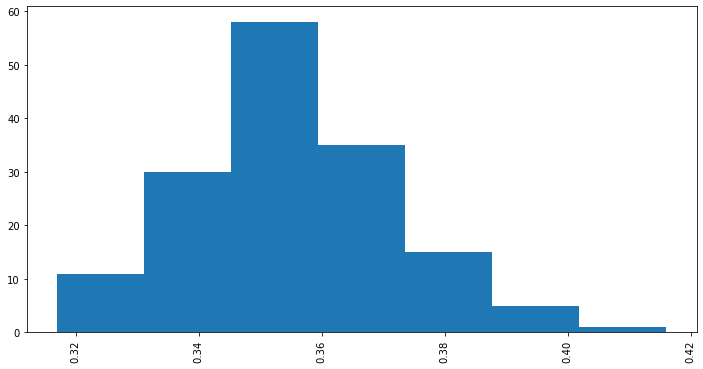

In [67]:
plt.figure(figsize=(12,6))

_ = plt.hist(df['3P%-Total'], bins=7)
_ = plt.xticks(rotation=90)
plt.show()

In [68]:
df.isnull().sum()/df.shape[0]

Team             0.0
G                0.0
MP-Total         0.0
FGM-Total        0.0
FGA-Total        0.0
FG%-Total        0.0
3PM-Total        0.0
3PA-Total        0.0
3P%-Total        0.0
2PM-Total        0.0
2PA-Total        0.0
2P%-Total        0.0
FTM-Total        0.0
FTA-Total        0.0
FT%-Total        0.0
ORB-Total        0.0
DRB-Total        0.0
TRB-Total        0.0
AST-Total        0.0
STL-Total        0.0
BLK-Total        0.0
TOV-Total        0.0
PF-Total         0.0
PTS-Total        0.0
MP-PG            0.0
FGM-PG           0.0
FGA-PG           0.0
FG%-PG           0.0
3PM-PG           0.0
3PA-PG           0.0
3P%-PG           0.0
2PM-PG           0.0
2PA-PG           0.0
2P%-PG           0.0
FTM-PG           0.0
FTA-PG           0.0
FT%-PG           0.0
ORB-PG           0.0
DRB-PG           0.0
TRB-PG           0.0
AST-PG           0.0
STL-PG           0.0
BLK-PG           0.0
TOV-PG           0.0
PF-PG            0.0
PTS-PG           0.0
season           0.0
made_playoffs

In [69]:
"""
Lot of these values when compared between teams look very similar
I want to see how many unique values each of these features hold
"""
def unique_count(df, col):
    return df[col].nunique()

In [70]:
for col in df.columns: 
    print("# of unique values in {}:".format(col), unique_count(df, col))

# of unique values in Team: 31
# of unique values in G: 1
# of unique values in MP-Total: 18
# of unique values in FGM-Total: 134
# of unique values in FGA-Total: 135
# of unique values in FG%-Total: 53
# of unique values in 3PM-Total: 139
# of unique values in 3PA-Total: 151
# of unique values in 3P%-Total: 63
# of unique values in 2PM-Total: 139
# of unique values in 2PA-Total: 145
# of unique values in 2P%-Total: 72
# of unique values in FTM-Total: 133
# of unique values in FTA-Total: 129
# of unique values in FT%-Total: 84
# of unique values in ORB-Total: 128
# of unique values in DRB-Total: 133
# of unique values in TRB-Total: 132
# of unique values in AST-Total: 138
# of unique values in STL-Total: 115
# of unique values in BLK-Total: 115
# of unique values in TOV-Total: 126
# of unique values in PF-Total: 126
# of unique values in PTS-Total: 145
# of unique values in MP-PG: 16
# of unique values in FGM-PG: 68
# of unique values in FGA-PG: 76
# of unique values in FG%-PG: 53
# of

In [71]:
stat_cols = list(dict.fromkeys([i.split('-')[0] for i in df.columns]))
stat_cols

['Team',
 'G',
 'MP',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 '2PM',
 '2PA',
 '2P%',
 'FTM',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'season',
 'made_playoffs']

In [72]:
# there isn't much categorical data, adding in myself
## splitting the data by division
atlantic = ['Boston Celtics', 'Philadelphia 76ers', 'Brooklyn Nets', 
            'New York Knicks', 'Toronto Raptors']

central = ['Milwaukee Bucks', 'Indiana Pacers', 'Cleveland Cavaliers', 
          'Chicago Bulls', 'Detroit Pistons']

southeast = ['Atlanta Hawks', 'Orlando Magic', 'Charlotte Hornets', 
             'Miami Heat', 'Washington Wizards']

northwest = ['Utah Jazz', 'Portland Trail Blazers', 'Denver Nuggets', 
             'Oklahoma City Thunder', 'Minnesota Timberwolves']

pacific = ['Los Angeles Lakers', 'Los Angeles Clippers', 'Phoenix Suns', 
           'Golden State Warriors', 'Sacramento Kings']

southwest = ['San Antonio Spurs', 'Memphis Grizzlies','Dallas Mavericks', 
             'New Orleans Pelicans', 'Houston Rockets']

In [73]:
df.loc[df.Team.isin(atlantic), 'division'] = 'Atlantic'
df.loc[df.Team.isin(central), 'division'] = 'Central'
df.loc[df.Team.isin(southeast), 'division'] = 'Southeast'
df.loc[df.Team.isin(northwest), 'division'] = 'Northwest'
df.loc[df.Team.isin(pacific), 'division'] = 'Pacific'
df.loc[df.Team.isin(southwest), 'division'] = 'Southwest'

In [74]:
# similar to conference, split/associated the data with conference
df.loc[df.Team.isin(atlantic), 'conference'] = 'east'
df.loc[df.Team.isin(central), 'conference'] = 'east'
df.loc[df.Team.isin(southeast), 'conference'] = 'east'
df.loc[df.Team.isin(northwest), 'conference'] = 'west'
df.loc[df.Team.isin(pacific), 'conference'] = 'west'
df.loc[df.Team.isin(southwest), 'conference'] = 'west'

In [75]:
# there are 15 teams in each conference and we are analyzing 5 seasons worth of data 
# 5*15 = 75
df.conference.value_counts()

east    75
west    75
Name: conference, dtype: int64

In [76]:
df['division'].value_counts()

Northwest    25
Southwest    25
Central      25
Southeast    25
Pacific      25
Atlantic     25
Name: division, dtype: int64

## Part 1: Basic Exploratory Data Analysis

- basic familiarity of the data (features, shape, values) 
- understanding different statistics and their meanings
- plotly basics with px and go
- building advanced graphs
- figuring out how do teams compare to their competitors

In [77]:
# which division has the most playoff appearances
fig = px.histogram(df, x='division', y='made_playoffs')
iplot(fig)

In [78]:
# teams correlated with all features -- Heatmap
fig= px.imshow(df, labels = dict(x="Features", y="Teams"))
fig.show()

In [79]:
fig = px.histogram(df, x='season', y='FGM-Total')
iplot(fig)

In [80]:
fig = px.histogram(df, x='conference', y='PF-PG')
iplot(fig)

In [81]:
data = {}
for i in stat_cols:
    if i not in ['G']:
        data[i] = df[[q for q in df.columns if q.startswith(i)]]

In [82]:
data['TOV']

TOV-Total  TOV-PG
0        1185    14.5
1        1012    12.3
2        1062    13.0
3        1057    12.9
4        1205    14.7
..        ...     ...
26       1159    14.1
27       1151    14.0
28       1106    13.5
29       1147    14.0
30       1155    14.1

[155 rows x 2 columns]

In [83]:
Teams = {}
for i in df.Team.unique():
    Teams[i] = df[df.Team == i]

In [84]:
Teams['Los Angeles Lakers'].sort_values('FG%-PG', ascending=False)

Team   G  MP-Total  FGM-Total  FGA-Total  FG%-Total  \
15  Los Angeles Lakers  82     19780       3491       7425      0.470   
10  Los Angeles Lakers  82     19905       3338       7248      0.461   
16  Los Angeles Lakers  82     19705       3224       7164      0.450   
18  Los Angeles Lakers  82     19930       3054       7020      0.435   
29  Los Angeles Lakers  82     19730       2880       6956      0.414   

    3PM-Total  3PA-Total  3P%-Total  2PM-Total  ...  AST-PG  STL-PG  BLK-PG  \
15        847       2541      0.333       2644  ...    25.6     7.5     5.4   
10        822       2384      0.345       2516  ...    23.8     7.7     4.7   
16        730       2110      0.346       2494  ...    20.9     8.2     3.9   
18        532       1546      0.344       2522  ...    20.9     7.0     4.5   
29        639       2016      0.317       2241  ...    18.0     7.2     4.1   

    TOV-PG  PF-PG  PTS-PG   season  made_playoffs  division  conference  
15    15.7   20.7   111.8  2018-19              0   Pacific        west  
10    15.8   21.2   108.1  2017-18              0   Pacific        west  
16    15.2   20.7   104.6  2016-17              0   Pacific        west  
18    13.2   21.2    98.5  2014-15              0   Pacific        west  
29    13.7   20.3    97.3  2015-16              0   Pacific        west  

[5 rows x 50 columns]

In [85]:
min_per_game = df['MP-PG'].value_counts()
min_per_game

241.8    22
241.2    20
241.5    19
242.1    17
240.9    16
242.4    16
240.6    12
240.3     9
242.7     8
243.0     6
243.4     4
241.6     2
243.7     1
241.4     1
242.0     1
244.0     1
Name: MP-PG, dtype: int64

In [86]:
Divisions = {}
for i in df.division.unique():
    Divisions[i] = df[df.division == i]

In [87]:
Divisions.keys()

dict_keys(['Pacific', 'Southwest', 'Atlantic', 'Northwest', 'Central', 'Southeast', nan])

In [88]:
Seasons = {}
for i in df.season.unique():
    Seasons[i] = df[df.season == i]

In [89]:
szn = pd.DataFrame(Seasons.items())
szn.head()

0                                                  1
0  2014-15                        Team   G  MP-Total  FGM-...
1  2015-16                        Team   G  MP-Total  FGM-...
2  2016-17                        Team   G  MP-Total  FGM-...
3  2017-18                        Team   G  MP-Total  FGM-...
4  2018-19                        Team   G  MP-Total  FGM-...

In [90]:
Seasons.keys()

dict_keys(['2014-15', '2015-16', '2016-17', '2017-18', '2018-19'])

In [91]:
Divisions['Pacific'].columns = list(Divisions['Pacific'].mode().iloc[0:])
pac = Divisions['Pacific'][['Team', 'season', 'FG%-PG']]
pac = pac.sort_values('FG%-PG', ascending = False)
fig = px.bar(x=pac.Team, y=pac['FG%-PG'], color = pac['season'])
fig.update_layout(barmode='stack')
iplot(fig)

In [92]:
fig = go.Figure(data=[
    go.Histogram(name='atlantic', x=Divisions['Atlantic']['division'], y=Divisions['Atlantic']['3P%-PG'],),
    go.Histogram(name='pacific', x=Divisions['Pacific']['division'], y=Divisions['Pacific']['3P%-PG'])
])
# Change the bar mode
fig.update_layout(barmode='group')
iplot(fig)

In [93]:
fig = go.Figure(data=[
    go.Histogram(name='atlantic', x=Divisions['Atlantic']['Team'], y=Divisions['Atlantic']['3P%-PG'],),
    go.Histogram(name='pacific', x=Divisions['Pacific']['Team'], y=Divisions['Pacific']['3P%-PG'])
])
# Change the bar mode
fig.update_layout(barmode='group')
iplot(fig)

In [94]:
Seasons['2015-16']['division']

0       Pacific
1     Northwest
2       Pacific
3     Southwest
4      Atlantic
5     Northwest
6       Pacific
7       Central
8     Southeast
9     Southwest
10    Southeast
11    Southeast
12    Southwest
13     Atlantic
14    Northwest
15    Southwest
16      Central
17    Southeast
18      Central
19    Northwest
20      Central
21      Pacific
22    Southeast
23    Southwest
24      Central
25     Atlantic
26     Atlantic
27    Northwest
28     Atlantic
29      Pacific
30          NaN
Name: division, dtype: object

## Part 2: Buidling Advanced Graphs

In [95]:
#https://stackoverflow.com/questions/59406167/plotly-how-to-filter-a-pandas-dataframe-using-a-dropdown-menu
#https://plotly.com/python/dropdowns/




fig = go.Figure()
fig.add_trace(go.Bar(name = 'Team', x= df['Team'], y=df.values
                    ))


buttons = []

#for each graph we want to show, we need a button for it
#you can do a lot with dropdowns, not just replace data 
# button with one option for each dataframe
for col in df.columns[3:]:
    buttons.append(dict(method='restyle',
                        label=col,
                        visible=True,
                        args=[{'y':[df[col]],
                               'x':[df['Team']],
                               'type':'bar'}, [0]],
                        )
                  )


updatemenu = []
your_menu = {}
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=updatemenu, xaxis_title = 'Team',yaxis_title='STAT')
iplot(fig)

In [96]:
fig = go.Figure(layout=go.Layout(title= go.layout.Title(text="Comparing Teams by 3P% - perGame")))
fig.add_trace(go.Bar(name= 'Team 1', x= df.index, y=df.values))

buttons = []
# add buttons for first series of bars  
for i in list(Teams.keys())[0:]:
    buttons.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[Teams[i]['3P%-PG']],
                               'x':[Teams[i]['season'].unique()],
                               'type':'bar'}, [0]], 
                        )
                  )

fig.add_trace(go.Bar(name= 'Team 2',x= df.index, y=df.values))

buttons2 = []
# add buttons for second series of bars               
for i in list(Teams.keys())[0:]:
    buttons2.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[Teams[i]['3P%-PG']],
                               'x':[Teams[i]['season'].unique()],
                               'type':'bar'}, [1]], 
                        )                         
                  )
    

# adjusted dropdown placement 
#found out updatemenus take a dictionary of buttons and allow you to format how the dropdowns look etc.
# https://plotly.com/python/dropdowns/
button_layer_1_height = 1.23
updatemenus = list([
    dict(buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"),
    dict(buttons=buttons2,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.5,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top")])


fig.update_layout(annotations=[
        dict(text="Team 1", x=0, xref="paper", y=1.15, yref="paper",
                             align="left", showarrow=False),
        dict(text="Team 2", x=0.46, xref="paper", y=1.15,
                             yref="paper", showarrow=False)
    ])
fig.update_layout(updatemenus=updatemenus, 
                  title = {'x':.25 , 'y':1.0}, 
                 xaxis_title = 'Season', 
                 yaxis_title = '3-Point Percentage Per Game')
iplot(fig)

#add topline to each for all types
# add seleciton 1 and selection 2

In [97]:
data.keys()

dict_keys(['Team', 'MP', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', '2PM', '2PA', '2P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'season', 'made_playoffs'])

In [98]:
#data.season.unique()

In [99]:
Teams['Los Angeles Clippers'].values

array([['Los Angeles Clippers', 82, 19730, 3228, 6830, 0.473, 827, 2202,
        0.376, 2401, 4628, 0.519, 1468, 2067, 0.71, 784, 2711, 3495,
        2031, 640, 409, 1012, 1749, 8751, 240.6, 39.4, 83.3, 0.473, 10.1,
        26.9, 0.376, 29.3, 56.4, 0.519, 17.9, 25.2, 0.71, 9.6, 33.1,
        42.6, 24.8, 7.8, 5.0, 12.3, 21.3, 106.7, '2014-15', 1, 'Pacific',
        'west'],
       ['Los Angeles Clippers', 82, 19830, 3141, 6759, 0.465, 797, 2190,
        0.364, 2344, 4569, 0.513, 1490, 2152, 0.692, 721, 2727, 3448,
        1873, 709, 460, 1063, 1746, 8569, 241.8, 38.3, 82.4, 0.465, 9.7,
        26.7, 0.364, 28.6, 55.7, 0.513, 18.2, 26.2, 0.692, 8.8, 33.3,
        42.0, 22.8, 8.6, 5.6, 13.0, 21.3, 104.5, '2015-16', 1, 'Pacific',
        'west'],
       ['Los Angeles Clippers', 82, 19755, 3242, 6820, 0.475, 841, 2245,
        0.375, 2401, 4575, 0.525, 1586, 2128, 0.745, 738, 2790, 3528,
        1848, 612, 347, 1062, 1626, 8911, 240.9, 39.5, 83.2, 0.475, 10.3,
        27.4, 0.375, 29.3, 55.

In [100]:
fig = go.Figure(layout=go.Layout(title= go.layout.Title(text="Comparing Teams by Stats")))
fig.add_trace(go.Bar(name= 'Team 1', x= df.index, y=df.values))

buttons = []
# add buttons for first series of bars  
for i in list(Teams.keys())[0:]:
    buttons.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[Teams[i].values],
                               'x':[Teams[i]['season'].unique()],
                               'type':'bar'}, [0]], 
                        )
                  )

fig.add_trace(go.Bar(name= 'Team 2',x= df.index, y=df.values))

buttons2 = []
# add buttons for second series of bars               
for i in list(Teams.keys())[0:]:
    buttons2.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[Teams[i].values],
                               'x':[Teams[i]['season'].unique()],
                               'type':'bar'}, [1]], 
                        )                        
                  )
buttons3 = []
for i in list(df.keys())[3:]:
    buttons3.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[df[i].values],
                               'x':[df['season'].unique()],
                               'type':'bar'}, [1]],
                        )                        
                  )

# adjusted dropdown placement 
#found out updatemenus take a dictionary of buttons and allow you to format how the dropdowns look etc.
# https://plotly.com/python/dropdowns/
button_layer_1_height = 1.23
updatemenus = list([
    dict(buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"),
    dict(buttons=buttons2,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.54,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"), 
    dict(buttons=buttons3,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.95,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top")])


fig.update_layout(annotations=[
        dict(text="Team 1", x=0, xref="paper", y=1.15, yref="paper",
                             align="left", showarrow=False),
        dict(text="Team 2", x=0.80, xref="paper", y=1.25,
                             yref="paper", showarrow=False), 
        dict(text="Statistic", x=1.15, xref="paper", y=1.25,
                             yref="paper", showarrow=False)
    ])
fig.update_layout(updatemenus=updatemenus, 
                  title = {'x':.10 , 'y':0.96}, 
                 xaxis_title = 'Season', 
                 yaxis_title = 'Stats')
iplot(fig)

#add topline to each for all types
# add seleciton 1 and selection 2

In [101]:
Teams.keys()

dict_keys(['Golden State Warriors', 'Los Angeles Clippers', 'Dallas Mavericks', 'Toronto Raptors', 'Oklahoma City Thunder', 'Houston Rockets', 'San Antonio Spurs', 'Cleveland Cavaliers', 'Portland Trail Blazers', 'Atlanta Hawks', 'Phoenix Suns', 'Denver Nuggets', 'Boston Celtics', 'Sacramento Kings', 'Chicago Bulls', 'New Orleans Pelicans', 'Washington Wizards', 'Detroit Pistons', 'Los Angeles Lakers', 'Memphis Grizzlies', 'Brooklyn Nets', 'Milwaukee Bucks', 'Minnesota Timberwolves', 'Indiana Pacers', 'Orlando Magic', 'Utah Jazz', 'Miami Heat', 'Charlotte Hornets', 'Philadelphia 76ers', 'New York Knicks', 'League Average'])

In [102]:
#[d.get('Feature3') for d in a]
#for i in list(df.keys())[0:]:
#    print(df[i].get() for)
    
    
#df['dic'].apply(lambda x: x.get('Feature3'))   

In [103]:
Teams['Golden State Warriors'].values

array([['Golden State Warriors', 82, 19730, 3410, 7137, 0.478, 883, 2217,
        0.398, 2527, 4920, 0.514, 1313, 1709, 0.768, 853, 2814, 3667,
        2248, 762, 496, 1185, 1628, 9016, 240.6, 41.6, 87.0, 0.478, 10.8,
        27.0, 0.398, 30.8, 60.0, 0.514, 16.0, 20.8, 0.768, 10.4, 34.3,
        44.7, 27.4, 9.3, 6.0, 14.5, 19.9, 110.0, '2014-15', 1, 'Pacific',
        'west'],
       ['Golden State Warriors', 82, 19880, 3489, 7159, 0.487, 1077,
        2592, 0.416, 2412, 4567, 0.528, 1366, 1790, 0.763, 816, 2972,
        3788, 2373, 689, 498, 1245, 1701, 9421, 242.4, 42.5, 87.3, 0.487,
        13.1, 31.6, 0.416, 29.4, 55.7, 0.528, 16.7, 21.8, 0.763, 10.0,
        36.2, 46.2, 28.9, 8.4, 6.1, 15.2, 20.7, 114.9, '2015-16', 1,
        'Pacific', 'west'],
       ['Golden State Warriors', 82, 19780, 3532, 7140, 0.495, 982, 2562,
        0.383, 2550, 4578, 0.557, 1457, 1850, 0.788, 770, 2873, 3643,
        2491, 785, 555, 1211, 1585, 9503, 241.2, 43.1, 87.1, 0.495, 12.0,
        31.2, 0.383, 

In [104]:
for i in list(df.columns):
    print(df[i].values)

['Golden State Warriors' 'Los Angeles Clippers' 'Dallas Mavericks'
 'Toronto Raptors' 'Oklahoma City Thunder' 'Houston Rockets'
 'San Antonio Spurs' 'Cleveland Cavaliers' 'Portland Trail Blazers'
 'Atlanta Hawks' 'Phoenix Suns' 'Denver Nuggets' 'Boston Celtics'
 'Sacramento Kings' 'Chicago Bulls' 'New Orleans Pelicans'
 'Washington Wizards' 'Detroit Pistons' 'Los Angeles Lakers'
 'Memphis Grizzlies' 'Brooklyn Nets' 'Milwaukee Bucks'
 'Minnesota Timberwolves' 'Indiana Pacers' 'Orlando Magic' 'Utah Jazz'
 'Miami Heat' 'Charlotte Hornets' 'Philadelphia 76ers' 'New York Knicks'
 'League Average' 'Golden State Warriors' 'Oklahoma City Thunder'
 'Sacramento Kings' 'Houston Rockets' 'Boston Celtics'
 'Portland Trail Blazers' 'Los Angeles Clippers' 'Cleveland Cavaliers'
 'Washington Wizards' 'San Antonio Spurs' 'Charlotte Hornets'
 'Atlanta Hawks' 'New Orleans Pelicans' 'Toronto Raptors'
 'Minnesota Timberwolves' 'Dallas Mavericks' 'Indiana Pacers'
 'Orlando Magic' 'Detroit Pistons' 'Denver Nu

In [105]:
data['Team'].value_counts().index

MultiIndex([(         'Atlanta Hawks',),
            (            'Miami Heat',),
            (             'Utah Jazz',),
            (       'Toronto Raptors',),
            (     'San Antonio Spurs',),
            (      'Sacramento Kings',),
            ('Portland Trail Blazers',),
            (          'Phoenix Suns',),
            (    'Philadelphia 76ers',),
            (         'Orlando Magic',),
            ( 'Oklahoma City Thunder',),
            (       'New York Knicks',),
            (  'New Orleans Pelicans',),
            ('Minnesota Timberwolves',),
            (       'Milwaukee Bucks',),
            (     'Memphis Grizzlies',),
            (        'Boston Celtics',),
            (    'Los Angeles Lakers',),
            (  'Los Angeles Clippers',),
            (        'League Average',),
            (        'Indiana Pacers',),
            (       'Houston Rockets',),
            ( 'Golden State Warriors',),
            (       'Detroit Pistons',),
            (   

In [106]:
fig = go.Figure(layout=go.Layout(title= go.layout.Title(text="Comparing Teams by Stats")))
fig.add_trace(go.Bar(name= 'Team 1', x= df.index, y=df.values.tolist()))

buttons = []
# add buttons for first series of bars  
for i in list(Teams.keys())[0:]:
    buttons.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[Teams[i].values],
                               'x':[Teams[i]['season'].unique()],
                               'type':'bar'}, [0]], 
                        )
                  )

fig.add_trace(go.Bar(name= 'Team 2',x= df.index, y=df.values.tolist()))

buttons2 = []
# add buttons for second series of bars               
for i in list(Teams.keys())[0:]:
    buttons2.append(dict(method='restyle',
                        label= i,
                        visible=True,
                        args=[{'y':[Teams[i].values],
                               'x':[Teams[i]['season'].unique()],
                               'type':'bar'}, [1]], 
                        )                        
                  )
x = df.columns.unique()[3:]

    
buttons3 = []

for i in list(data.keys())[3:]:
    buttons3.append(dict(method='restyle',
                         label= i,  
                         visible=True,
                         args=[{'y':[data[i].values],
                                'x':[data['season'].value_counts().index],
                                'type':'bar'}, [1]],
                        )                        
                    )

# adjusted dropdown placement 
#found out updatemenus take a dictionary of buttons and allow you to format how the dropdowns look etc.
# https://plotly.com/python/dropdowns/
button_layer_1_height = 1.23
updatemenus = list([
    dict(buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"),
    dict(buttons=buttons2,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.5,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"), 
    dict(buttons=buttons3,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.9,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top")])


fig.update_layout(annotations=[
        dict(text="Team 1", x=0, xref="paper", y=1.15, yref="paper",
                             align="left", showarrow=False),
        dict(text="Team 2", x=0.46, xref="paper", y=1.15,
                             yref="paper", showarrow=False), 
        dict(text="Statistic", x=0.88, xref="paper", y=1.15,
                             yref="paper", showarrow=False)
    ])
fig.update_layout(updatemenus=updatemenus, 
                  title = {'x':.25 , 'y':1.0}, 
                 xaxis_title = 'Season', 
                 yaxis_title = 'Stats')
iplot(fig)

#add topline to each for all types
# add seleciton 1 and selection 2

In [107]:
df[df['Team'] == 'Los Angeles Lakers'].values

array([['Los Angeles Lakers', 82, 19930, 3054, 7020, 0.435, 532, 1546,
        0.344, 2522, 5474, 0.461, 1433, 1935, 0.741, 952, 2647, 3599,
        1715, 578, 366, 1086, 1741, 8073, 243.0, 37.2, 85.6, 0.435, 6.5,
        18.9, 0.344, 30.8, 66.8, 0.461, 17.5, 23.6, 0.741, 11.6, 32.3,
        43.9, 20.9, 7.0, 4.5, 13.2, 21.2, 98.5, '2014-15', 0, 'Pacific',
        'west'],
       ['Los Angeles Lakers', 82, 19730, 2880, 6956, 0.414, 639, 2016,
        0.317, 2241, 4940, 0.454, 1583, 2028, 0.781, 878, 2645, 3523,
        1478, 593, 337, 1124, 1662, 7982, 240.6, 35.1, 84.8, 0.414, 7.8,
        24.6, 0.317, 27.3, 60.2, 0.454, 19.3, 24.7, 0.781, 10.7, 32.3,
        43.0, 18.0, 7.2, 4.1, 13.7, 20.3, 97.3, '2015-16', 0, 'Pacific',
        'west'],
       ['Los Angeles Lakers', 82, 19705, 3224, 7164, 0.45, 730, 2110,
        0.346, 2494, 5054, 0.493, 1397, 1853, 0.754, 933, 2636, 3569,
        1716, 674, 320, 1243, 1698, 8575, 240.3, 39.3, 87.4, 0.45, 8.9,
        25.7, 0.346, 30.4, 61.6, 0.493

In [108]:
for i in list(df.columns)[3:]:
    print(df[i].values)

[3410 3228 3255 3108 3184 3032 3208 3089 3175 3121 3178 3099 3193 3010
 3001 3108 3139 3041 3054 3097 3069 3083 2986 2998 3076 2900 2885 2913
 2765 2882 3076 3489 3372 3283 3094 3216 3167 3141 3171 3238 3289 3036
 3168 3153 3006 3095 3064 3142 3242 3111 3093 3165 3051 3150 3019 3145
 3136 3022 2957 2970 2880 3136 3532 3305 3377 3275 3388 3242 3168 3243
 3270 3211 3237 3102 3235 3222 3221 3093 3224 3210 3244 3182 3202 3123
 3169 3105 3088 3269 3139 3033 2984 2968 3202 3509 3174 3500 3383 3311
 3338 3349 3365 3302 3197 3338 3271 3275 3136 3257 3222 3345 3334 3139
 3141 3153 3208 3184 3182 3130 3170 3202 3128 3013 3179 3248 3555 3612
 3581 3407 3384 3470 3497 3460 3541 3456 3218 3392 3413 3451 3301 3491
 3314 3468 3297 3439 3182 3390 3289 3316 3185 3251 3266 3134 3189 3113
 3369]
[7137 6830 7036 6829 7119 6832 6854 6739 7049 6699 7038 7158 7211 6617
 6797 6795 6790 7038 7020 6763 6804 6722 6820 6824 6792 6492 6330 6932
 6777 6726 6852 7159 7082 7083 6847 7318 7040 6759 6888 7033 6797 6922

In [109]:
#tms = df.Team.unique()
#for i in list(Teams.keys()):
#    if i in tms:
#        Teams[tms].columns
#x = list(Teams.keys())[0:]
#for i in list(Teams.keys())[0:]: 
#    for s in Teams[i].columns.unique():
#        Teams[i][s].values
#print(x)
x = df.columns.unique()[3:]
s = df.season.unique()
y = df.Team.unique()
for i in y:
    for c in x:
        for b in s:
            print(Teams[i][c].values)

[3410 3489 3532 3509 3612]
[3410 3489 3532 3509 3612]
[3410 3489 3532 3509 3612]
[3410 3489 3532 3509 3612]
[3410 3489 3532 3509 3612]
[7137 7159 7140 6981 7361]
[7137 7159 7140 6981 7361]
[7137 7159 7140 6981 7361]
[7137 7159 7140 6981 7361]
[7137 7159 7140 6981 7361]
[0.478 0.487 0.495 0.503 0.491]
[0.478 0.487 0.495 0.503 0.491]
[0.478 0.487 0.495 0.503 0.491]
[0.478 0.487 0.495 0.503 0.491]
[0.478 0.487 0.495 0.503 0.491]
[ 883 1077  982  926 1087]
[ 883 1077  982  926 1087]
[ 883 1077  982  926 1087]
[ 883 1077  982  926 1087]
[ 883 1077  982  926 1087]
[2217 2592 2562 2370 2824]
[2217 2592 2562 2370 2824]
[2217 2592 2562 2370 2824]
[2217 2592 2562 2370 2824]
[2217 2592 2562 2370 2824]
[0.398 0.416 0.383 0.391 0.385]
[0.398 0.416 0.383 0.391 0.385]
[0.398 0.416 0.383 0.391 0.385]
[0.398 0.416 0.383 0.391 0.385]
[0.398 0.416 0.383 0.391 0.385]
[2527 2412 2550 2583 2525]
[2527 2412 2550 2583 2525]
[2527 2412 2550 2583 2525]
[2527 2412 2550 2583 2525]
[2527 2412 2550 2583 2525]
[4920

['west' 'west' 'west' 'west' 'west']
['west' 'west' 'west' 'west' 'west']
['west' 'west' 'west' 'west' 'west']
[3255 3064 2968 3128 3182]
[3255 3064 2968 3128 3182]
[3255 3064 2968 3128 3182]
[3255 3064 2968 3128 3182]
[3255 3064 2968 3128 3182]
[7036 6900 6750 7042 7122]
[7036 6900 6750 7042 7122]
[7036 6900 6750 7042 7122]
[7036 6900 6750 7042 7122]
[7036 6900 6750 7042 7122]
[0.463 0.444 0.44  0.444 0.447]
[0.463 0.444 0.44  0.444 0.447]
[0.463 0.444 0.44  0.444 0.447]
[0.463 0.444 0.44  0.444 0.447]
[0.463 0.444 0.44  0.444 0.447]
[ 732  806  878  967 1022]
[ 732  806  878  967 1022]
[ 732  806  878  967 1022]
[ 732  806  878  967 1022]
[ 732  806  878  967 1022]
[2082 2342 2473 2688 3002]
[2082 2342 2473 2688 3002]
[2082 2342 2473 2688 3002]
[2082 2342 2473 2688 3002]
[2082 2342 2473 2688 3002]
[0.352 0.344 0.355 0.36  0.34 ]
[0.352 0.344 0.355 0.36  0.34 ]
[0.352 0.344 0.355 0.36  0.34 ]
[0.352 0.344 0.355 0.36  0.34 ]
[0.352 0.344 0.355 0.36  0.34 ]
[2523 2258 2090 2161 2160]
[2

[58.2 58.  60.  54.4 55.3]
[58.2 58.  60.  54.4 55.3]
[58.2 58.  60.  54.4 55.3]
[58.2 58.  60.  54.4 55.3]
[58.2 58.  60.  54.4 55.3]
[0.499 0.483 0.505 0.541 0.539]
[0.499 0.483 0.505 0.541 0.539]
[0.499 0.483 0.505 0.541 0.539]
[0.499 0.483 0.505 0.541 0.539]
[0.499 0.483 0.505 0.541 0.539]
[19.3 20.8 19.7 17.3 17.7]
[19.3 20.8 19.7 17.3 17.7]
[19.3 20.8 19.7 17.3 17.7]
[19.3 20.8 19.7 17.3 17.7]
[19.3 20.8 19.7 17.3 17.7]
[24.6 26.7 24.7 21.8 22. ]
[24.6 26.7 24.7 21.8 22. ]
[24.6 26.7 24.7 21.8 22. ]
[24.6 26.7 24.7 21.8 22. ]
[24.6 26.7 24.7 21.8 22. ]
[0.787 0.777 0.796 0.794 0.804]
[0.787 0.777 0.796 0.794 0.804]
[0.787 0.777 0.796 0.794 0.804]
[0.787 0.777 0.796 0.794 0.804]
[0.787 0.777 0.796 0.794 0.804]
[10.7 10.2 10.6  9.8  9.6]
[10.7 10.2 10.6  9.8  9.6]
[10.7 10.2 10.6  9.8  9.6]
[10.7 10.2 10.6  9.8  9.6]
[10.7 10.2 10.6  9.8  9.6]
[30.8 33.2 32.6 34.2 35.6]
[30.8 33.2 32.6 34.2 35.6]
[30.8 33.2 32.6 34.2 35.6]
[30.8 33.2 32.6 34.2 35.6]
[30.8 33.2 32.6 34.2 35.6]
[41.5

[0 1 1 1 1]
[0 1 1 1 1]
[0 1 1 1 1]
[0 1 1 1 1]
['Northwest' 'Northwest' 'Northwest' 'Northwest' 'Northwest']
['Northwest' 'Northwest' 'Northwest' 'Northwest' 'Northwest']
['Northwest' 'Northwest' 'Northwest' 'Northwest' 'Northwest']
['Northwest' 'Northwest' 'Northwest' 'Northwest' 'Northwest']
['Northwest' 'Northwest' 'Northwest' 'Northwest' 'Northwest']
['west' 'west' 'west' 'west' 'west']
['west' 'west' 'west' 'west' 'west']
['west' 'west' 'west' 'west' 'west']
['west' 'west' 'west' 'west' 'west']
['west' 'west' 'west' 'west' 'west']
[3032 3094 3305 3174 3218]
[3032 3094 3305 3174 3218]
[3032 3094 3305 3174 3218]
[3032 3094 3305 3174 3218]
[3032 3094 3305 3174 3218]
[6832 6847 7152 6906 7163]
[6832 6847 7152 6906 7163]
[6832 6847 7152 6906 7163]
[6832 6847 7152 6906 7163]
[6832 6847 7152 6906 7163]
[0.444 0.452 0.462 0.46  0.449]
[0.444 0.452 0.462 0.46  0.449]
[0.444 0.452 0.462 0.46  0.449]
[0.444 0.452 0.462 0.46  0.449]
[0.444 0.452 0.462 0.46  0.449]
[ 933  878 1181 1256 1323]


[3089 3171 3275 3311 3189]
[3089 3171 3275 3311 3189]
[6739 6888 6963 6950 7184]
[6739 6888 6963 6950 7184]
[6739 6888 6963 6950 7184]
[6739 6888 6963 6950 7184]
[6739 6888 6963 6950 7184]
[0.458 0.46  0.47  0.476 0.444]
[0.458 0.46  0.47  0.476 0.444]
[0.458 0.46  0.47  0.476 0.444]
[0.458 0.46  0.47  0.476 0.444]
[0.458 0.46  0.47  0.476 0.444]
[ 826  880 1067  981  847]
[ 826  880 1067  981  847]
[ 826  880 1067  981  847]
[ 826  880 1067  981  847]
[ 826  880 1067  981  847]
[2253 2428 2779 2636 2388]
[2253 2428 2779 2636 2388]
[2253 2428 2779 2636 2388]
[2253 2428 2779 2636 2388]
[2253 2428 2779 2636 2388]
[0.367 0.362 0.384 0.372 0.355]
[0.367 0.362 0.384 0.372 0.355]
[0.367 0.362 0.384 0.372 0.355]
[0.367 0.362 0.384 0.372 0.355]
[0.367 0.362 0.384 0.372 0.355]
[2263 2291 2208 2330 2342]
[2263 2291 2208 2330 2342]
[2263 2291 2208 2330 2342]
[2263 2291 2208 2330 2342]
[2263 2291 2208 2330 2342]
[4486 4460 4184 4314 4796]
[4486 4460 4184 4314 4796]
[4486 4460 4184 4314 4796]
[4486

[45.9 45.5 43.7 45.5 48. ]
[45.9 45.5 43.7 45.5 48. ]
[45.9 45.5 43.7 45.5 48. ]
[21.9 21.3 21.1 19.5 23. ]
[21.9 21.3 21.1 19.5 23. ]
[21.9 21.3 21.1 19.5 23. ]
[21.9 21.3 21.1 19.5 23. ]
[21.9 21.3 21.1 19.5 23. ]
[6.4 6.9 7.  7.  6.7]
[6.4 6.9 7.  7.  6.7]
[6.4 6.9 7.  7.  6.7]
[6.4 6.9 7.  7.  6.7]
[6.4 6.9 7.  7.  6.7]
[4.5 4.6 5.  5.2 5. ]
[4.5 4.6 5.  5.2 5. ]
[4.5 4.6 5.  5.2 5. ]
[4.5 4.6 5.  5.2 5. ]
[4.5 4.6 5.  5.2 5. ]
[13.6 14.6 13.7 13.5 13.8]
[13.6 14.6 13.7 13.5 13.8]
[13.6 14.6 13.7 13.5 13.8]
[13.6 14.6 13.7 13.5 13.8]
[13.6 14.6 13.7 13.5 13.8]
[18.2 21.7 21.2 19.5 20.4]
[18.2 21.7 21.2 19.5 20.4]
[18.2 21.7 21.2 19.5 20.4]
[18.2 21.7 21.2 19.5 20.4]
[18.2 21.7 21.2 19.5 20.4]
[102.8 105.1 107.9 105.6 114.7]
[102.8 105.1 107.9 105.6 114.7]
[102.8 105.1 107.9 105.6 114.7]
[102.8 105.1 107.9 105.6 114.7]
[102.8 105.1 107.9 105.6 114.7]
['2014-15' '2015-16' '2016-17' '2017-18' '2018-19']
['2014-15' '2015-16' '2016-17' '2017-18' '2018-19']
['2014-15' '2015-16' '2016-17'

[25.  25.8 22.6 27.9 29.3]
[0.341 0.348 0.332 0.334 0.329]
[0.341 0.348 0.332 0.334 0.329]
[0.341 0.348 0.332 0.334 0.329]
[0.341 0.348 0.332 0.334 0.329]
[0.341 0.348 0.332 0.334 0.329]
[30.2 28.2 32.4 29.1 30.5]
[30.2 28.2 32.4 29.1 30.5]
[30.2 28.2 32.4 29.1 30.5]
[30.2 28.2 32.4 29.1 30.5]
[30.2 28.2 32.4 29.1 30.5]
[60.9 59.8 65.9 59.2 58.1]
[60.9 59.8 65.9 59.2 58.1]
[60.9 59.8 65.9 59.2 58.1]
[60.9 59.8 65.9 59.2 58.1]
[60.9 59.8 65.9 59.2 58.1]
[0.497 0.472 0.491 0.492 0.525]
[0.497 0.472 0.491 0.492 0.525]
[0.497 0.472 0.491 0.492 0.525]
[0.497 0.472 0.491 0.492 0.525]
[0.497 0.472 0.491 0.492 0.525]
[16.4 17.5 20.4 17.7 17.6]
[16.4 17.5 20.4 17.7 17.6]
[16.4 17.5 20.4 17.7 17.6]
[16.4 17.5 20.4 17.7 17.6]
[16.4 17.5 20.4 17.7 17.6]
[21.5 23.2 26.3 23.9 22.7]
[21.5 23.2 26.3 23.9 22.7]
[21.5 23.2 26.3 23.9 22.7]
[21.5 23.2 26.3 23.9 22.7]
[21.5 23.2 26.3 23.9 22.7]
[0.76  0.751 0.776 0.741 0.779]
[0.76  0.751 0.776 0.741 0.779]
[0.76  0.751 0.776 0.741 0.779]
[0.76  0.751 0.77

[0.754 0.788 0.807 0.771 0.802]
[910 950 744 767 804]
[910 950 744 767 804]
[910 950 744 767 804]
[910 950 744 767 804]
[910 950 744 767 804]
[2685 2733 2698 2878 2849]
[2685 2733 2698 2878 2849]
[2685 2733 2698 2878 2849]
[2685 2733 2698 2878 2849]
[2685 2733 2698 2878 2849]
[3595 3683 3442 3645 3653]
[3595 3683 3442 3645 3653]
[3595 3683 3442 3645 3653]
[3595 3683 3442 3645 3653]
[3595 3683 3442 3645 3653]
[2009 1981 2069 1842 2155]
[2009 1981 2069 1842 2155]
[2009 1981 2069 1842 2155]
[2009 1981 2069 1842 2155]
[2009 1981 2069 1842 2155]
[674 752 617 604 706]
[674 752 617 604 706]
[674 752 617 604 706]
[674 752 617 604 706]
[674 752 617 604 706]
[294 348 340 373 435]
[294 348 340 373 435]
[294 348 340 373 435]
[294 348 340 373 435]
[294 348 340 373 435]
[1133 1127 1088 1149 1052]
[1133 1127 1088 1149 1052]
[1133 1127 1088 1149 1052]
[1133 1127 1088 1149 1052]
[1133 1127 1088 1149 1052]
[1738 1796 1686 1618 1670]
[1738 1796 1686 1618 1670]
[1738 1796 1686 1618 1670]
[1738 1796 1686 1

[1618 1354 1474 1194 1328]
[2067 1720 1848 1574 1695]
[2067 1720 1848 1574 1695]
[2067 1720 1848 1574 1695]
[2067 1720 1848 1574 1695]
[2067 1720 1848 1574 1695]
[0.783 0.787 0.798 0.759 0.783]
[0.783 0.787 0.798 0.759 0.783]
[0.783 0.787 0.798 0.759 0.783]
[0.783 0.787 0.798 0.759 0.783]
[0.783 0.787 0.798 0.759 0.783]
[959 907 999 790 718]
[959 907 999 790 718]
[959 907 999 790 718]
[959 907 999 790 718]
[959 907 999 790 718]
[2792 2889 2797 2873 2799]
[2792 2889 2797 2873 2799]
[2792 2889 2797 2873 2799]
[2792 2889 2797 2873 2799]
[2792 2889 2797 2873 2799]
[3751 3796 3796 3663 3517]
[3751 3796 3796 3663 3517]
[3751 3796 3796 3663 3517]
[3751 3796 3796 3663 3517]
[3751 3796 3796 3663 3517]
[1781 1870 1851 1923 1796]
[1781 1870 1851 1923 1796]
[1781 1870 1851 1923 1796]
[1781 1870 1851 1923 1796]
[1781 1870 1851 1923 1796]
[514 495 643 626 603]
[514 495 643 626 603]
[514 495 643 626 603]
[514 495 643 626 603]
[514 495 643 626 603]
[476 470 393 289 351]
[476 470 393 289 351]
[476 470 

[63.6 62.1 60.2 60.1 62.4]
[63.6 62.1 60.2 60.1 62.4]
[63.6 62.1 60.2 60.1 62.4]
[63.6 62.1 60.2 60.1 62.4]
[63.6 62.1 60.2 60.1 62.4]
[0.484 0.482 0.495 0.54  0.536]
[0.484 0.482 0.495 0.54  0.536]
[0.484 0.482 0.495 0.54  0.536]
[0.484 0.482 0.495 0.54  0.536]
[0.484 0.482 0.495 0.54  0.536]
[16.4 17.3 16.7 16.1 17.8]
[16.4 17.3 16.7 16.1 17.8]
[16.4 17.3 16.7 16.1 17.8]
[16.4 17.3 16.7 16.1 17.8]
[16.4 17.3 16.7 16.1 17.8]
[21.8 22.2 22.3 20.9 23.4]
[21.8 22.2 22.3 20.9 23.4]
[21.8 22.2 22.3 20.9 23.4]
[21.8 22.2 22.3 20.9 23.4]
[21.8 22.2 22.3 20.9 23.4]
[0.751 0.776 0.75  0.772 0.761]
[0.751 0.776 0.75  0.772 0.761]
[0.751 0.776 0.75  0.772 0.761]
[0.751 0.776 0.75  0.772 0.761]
[0.751 0.776 0.75  0.772 0.761]
[11.5  9.5  8.6  8.7 11.1]
[11.5  9.5  8.6  8.7 11.1]
[11.5  9.5  8.6  8.7 11.1]
[11.5  9.5  8.6  8.7 11.1]
[11.5  9.5  8.6  8.7 11.1]
[32.  33.1 35.1 35.7 36.2]
[32.  33.1 35.1 35.7 36.2]
[32.  33.1 35.1 35.7 36.2]
[32.  33.1 35.1 35.7 36.2]
[32.  33.1 35.1 35.7 36.2]
[43.5

[15.  14.5 14.2 14.6 14.1]
[15.  14.5 14.2 14.6 14.1]
[15.  14.5 14.2 14.6 14.1]
[15.  14.5 14.2 14.6 14.1]
[15.  14.5 14.2 14.6 14.1]
[20.8 20.8 21.3 21.3 20.7]
[20.8 20.8 21.3 21.3 20.7]
[20.8 20.8 21.3 21.3 20.7]
[20.8 20.8 21.3 21.3 20.7]
[20.8 20.8 21.3 21.3 20.7]
[ 98.5 104.1 109.2 106.6 114. ]
[ 98.5 104.1 109.2 106.6 114. ]
[ 98.5 104.1 109.2 106.6 114. ]
[ 98.5 104.1 109.2 106.6 114. ]
[ 98.5 104.1 109.2 106.6 114. ]
['2014-15' '2015-16' '2016-17' '2017-18' '2018-19']
['2014-15' '2015-16' '2016-17' '2017-18' '2018-19']
['2014-15' '2015-16' '2016-17' '2017-18' '2018-19']
['2014-15' '2015-16' '2016-17' '2017-18' '2018-19']
['2014-15' '2015-16' '2016-17' '2017-18' '2018-19']
[1 0 1 1 0]
[1 0 1 1 0]
[1 0 1 1 0]
[1 0 1 1 0]
[1 0 1 1 0]
['Southeast' 'Southeast' 'Southeast' 'Southeast' 'Southeast']
['Southeast' 'Southeast' 'Southeast' 'Southeast' 'Southeast']
['Southeast' 'Southeast' 'Southeast' 'Southeast' 'Southeast']
['Southeast' 'Southeast' 'Southeast' 'Southeast' 'Southeast']
['

[0.339 0.331 0.354 0.352 0.342]
[0.339 0.331 0.354 0.352 0.342]
[2674 2515 2217 2255 2302]
[2674 2515 2217 2255 2302]
[2674 2515 2217 2255 2302]
[2674 2515 2217 2255 2302]
[2674 2515 2217 2255 2302]
[5517 5338 4685 4636 4556]
[5517 5338 4685 4636 4556]
[5517 5338 4685 4636 4556]
[5517 5338 4685 4636 4556]
[5517 5338 4685 4636 4556]
[0.485 0.471 0.473 0.486 0.505]
[0.485 0.471 0.473 0.486 0.505]
[0.485 0.471 0.473 0.486 0.505]
[0.485 0.471 0.473 0.486 0.505]
[0.485 0.471 0.473 0.486 0.505]
[1445 1584 1504 1361 1453]
[1445 1584 1504 1361 1453]
[1445 1584 1504 1361 1453]
[1445 1584 1504 1361 1453]
[1445 1584 1504 1361 1453]
[1869 2024 1918 1732 1882]
[1869 2024 1918 1732 1882]
[1869 2024 1918 1732 1882]
[1869 2024 1918 1732 1882]
[1869 2024 1918 1732 1882]
[0.773 0.783 0.784 0.786 0.772]
[0.773 0.783 0.784 0.786 0.772]
[0.773 0.783 0.784 0.786 0.772]
[0.773 0.783 0.784 0.786 0.772]
[0.773 0.783 0.784 0.786 0.772]
[856 916 886 779 723]
[856 916 886 779 723]
[856 916 886 779 723]
[856 916 8

[30.8 31.8 27.1 25.5 27.5]
[63.1 66.  53.6 51.1 53.6]
[63.1 66.  53.6 51.1 53.6]
[63.1 66.  53.6 51.1 53.6]
[63.1 66.  53.6 51.1 53.6]
[63.1 66.  53.6 51.1 53.6]
[0.489 0.481 0.506 0.5   0.513]
[0.489 0.481 0.506 0.5   0.513]
[0.489 0.481 0.506 0.5   0.513]
[0.489 0.481 0.506 0.5   0.513]
[0.489 0.481 0.506 0.5   0.513]
[16.6 15.7 19.4 17.4 19. ]
[16.6 15.7 19.4 17.4 19. ]
[16.6 15.7 19.4 17.4 19. ]
[16.6 15.7 19.4 17.4 19. ]
[16.6 15.7 19.4 17.4 19. ]
[22.2 20.7 24.6 22.6 25.5]
[22.2 20.7 24.6 22.6 25.5]
[22.2 20.7 24.6 22.6 25.5]
[22.2 20.7 24.6 22.6 25.5]
[22.2 20.7 24.6 22.6 25.5]
[0.748 0.757 0.788 0.772 0.745]
[0.748 0.757 0.788 0.772 0.745]
[0.748 0.757 0.788 0.772 0.745]
[0.748 0.757 0.788 0.772 0.745]
[0.748 0.757 0.788 0.772 0.745]
[10.3 10.5  8.8  9.7 11. ]
[10.3 10.5  8.8  9.7 11. ]
[10.3 10.5  8.8  9.7 11. ]
[10.3 10.5  8.8  9.7 11. ]
[10.3 10.5  8.8  9.7 11. ]
[32.  31.9 35.1 34.8 35.6]
[32.  31.9 35.1 34.8 35.6]
[32.  31.9 35.1 34.8 35.6]
[32.  31.9 35.1 34.8 35.6]
[32. 

[0.461 0.496 0.507 0.519 0.504]
[0.461 0.496 0.507 0.519 0.504]
[1638 1753 1586 1592 1570]
[1638 1753 1586 1592 1570]
[1638 1753 1586 1592 1570]
[1638 1753 1586 1592 1570]
[1638 1753 1586 1592 1570]
[2110 2213 1986 1980 1995]
[2110 2213 1986 1980 1995]
[2110 2213 1986 1980 1995]
[2110 2213 1986 1980 1995]
[2110 2213 1986 1980 1995]
[0.776 0.792 0.799 0.804 0.787]
[0.776 0.792 0.799 0.804 0.787]
[0.776 0.792 0.799 0.804 0.787]
[0.776 0.792 0.799 0.804 0.787]
[0.776 0.792 0.799 0.804 0.787]
[949 821 938 848 923]
[949 821 938 848 923]
[949 821 938 848 923]
[949 821 938 848 923]
[949 821 938 848 923]
[2406 2587 2540 2593 2750]
[2406 2587 2540 2593 2750]
[2406 2587 2540 2593 2750]
[2406 2587 2540 2593 2750]
[2406 2587 2540 2593 2750]
[3355 3408 3478 3441 3673]
[3355 3408 3478 3441 3673]
[3355 3408 3478 3441 3673]
[3355 3408 3478 3441 3673]
[3355 3408 3478 3441 3673]
[1771 1916 1940 1861 2018]
[1771 1916 1940 1861 2018]
[1771 1916 1940 1861 2018]
[1771 1916 1940 1861 2018]
[1771 1916 1940 18

[314 417 396 400 445]
[314 417 396 400 445]
[1221 1155 1091 1192 1082]
[1221 1155 1091 1192 1082]
[1221 1155 1091 1192 1082]
[1221 1155 1091 1192 1082]
[1221 1155 1091 1192 1082]
[1714 1701 1584 1579 1526]
[1714 1701 1584 1579 1526]
[1714 1701 1584 1579 1526]
[1714 1701 1584 1579 1526]
[1714 1701 1584 1579 1526]
[7847 8369 8288 8479 8800]
[7847 8369 8288 8479 8800]
[7847 8369 8288 8479 8800]
[7847 8369 8288 8479 8800]
[7847 8369 8288 8479 8800]
[240.9 242.7 241.5 240.6 241.2]
[240.9 242.7 241.5 240.6 241.2]
[240.9 242.7 241.5 240.6 241.2]
[240.9 242.7 241.5 240.6 241.2]
[240.9 242.7 241.5 240.6 241.2]
[37.5 39.5 38.3 38.8 40.4]
[37.5 39.5 38.3 38.8 40.4]
[37.5 39.5 38.3 38.8 40.4]
[37.5 39.5 38.3 38.8 40.4]
[37.5 39.5 38.3 38.8 40.4]
[82.8 86.8 87.  85.9 89.1]
[82.8 86.8 87.  85.9 89.1]
[82.8 86.8 87.  85.9 89.1]
[82.8 86.8 87.  85.9 89.1]
[82.8 86.8 87.  85.9 89.1]
[0.453 0.455 0.44  0.452 0.454]
[0.453 0.455 0.44  0.452 0.454]
[0.453 0.455 0.44  0.452 0.454]
[0.453 0.455 0.44  0.452 

[19.3 20.2 18.8 19.6 21.1]
[19.3 20.2 18.8 19.6 21.1]
[19.3 20.2 18.8 19.6 21.1]
[ 95.1  97.7 100.7 104.1 111.7]
[ 95.1  97.7 100.7 104.1 111.7]
[ 95.1  97.7 100.7 104.1 111.7]
[ 95.1  97.7 100.7 104.1 111.7]
[ 95.1  97.7 100.7 104.1 111.7]
['2014-15' '2015-16' '2016-17' '2017-18' '2018-19']
['2014-15' '2015-16' '2016-17' '2017-18' '2018-19']
['2014-15' '2015-16' '2016-17' '2017-18' '2018-19']
['2014-15' '2015-16' '2016-17' '2017-18' '2018-19']
['2014-15' '2015-16' '2016-17' '2017-18' '2018-19']
[0 0 1 1 1]
[0 0 1 1 1]
[0 0 1 1 1]
[0 0 1 1 1]
[0 0 1 1 1]
['Northwest' 'Northwest' 'Northwest' 'Northwest' 'Northwest']
['Northwest' 'Northwest' 'Northwest' 'Northwest' 'Northwest']
['Northwest' 'Northwest' 'Northwest' 'Northwest' 'Northwest']
['Northwest' 'Northwest' 'Northwest' 'Northwest' 'Northwest']
['Northwest' 'Northwest' 'Northwest' 'Northwest' 'Northwest']
['west' 'west' 'west' 'west' 'west']
['west' 'west' 'west' 'west' 'west']
['west' 'west' 'west' 'west' 'west']
['west' 'west' 'we

[2793 2869 2853 2901 2778]
[2793 2869 2853 2901 2778]
[2793 2869 2853 2901 2778]
[2793 2869 2853 2901 2778]
[2793 2869 2853 2901 2778]
[3613 3603 3574 3728 3592]
[3613 3603 3574 3728 3592]
[3613 3603 3574 3728 3592]
[3613 3603 3574 3728 3592]
[3613 3603 3574 3728 3592]
[1654 1778 1891 1770 1905]
[1654 1778 1891 1770 1905]
[1654 1778 1891 1770 1905]
[1654 1778 1891 1770 1905]
[1654 1778 1891 1770 1905]
[499 595 571 559 591]
[499 595 571 559 591]
[499 595 571 559 591]
[499 595 571 559 591]
[499 595 571 559 591]
[448 438 390 373 405]
[448 438 390 373 405]
[448 438 390 373 405]
[448 438 390 373 405]
[448 438 390 373 405]
[ 976 1030  942 1041 1001]
[ 976 1030  942 1041 1001]
[ 976 1030  942 1041 1001]
[ 976 1030  942 1041 1001]
[ 976 1030  942 1041 1001]
[1494 1487 1360 1409 1550]
[1494 1487 1360 1409 1550]
[1494 1487 1360 1409 1550]
[1494 1487 1360 1409 1550]
[1494 1487 1360 1409 1550]
[7721 8479 8601 8874 9081]
[7721 8479 8601 8874 9081]
[7721 8479 8601 8874 9081]
[7721 8479 8601 8874 908

[14.8 17.2 16.6 14.9 18.1]
[14.8 17.2 16.6 14.9 18.1]
[14.8 17.2 16.6 14.9 18.1]
[14.8 17.2 16.6 14.9 18.1]
[14.8 17.2 16.6 14.9 18.1]
[19.2 21.4 21.1 19.  23.9]
[19.2 21.4 21.1 19.  23.9]
[19.2 21.4 21.1 19.  23.9]
[19.2 21.4 21.1 19.  23.9]
[19.2 21.4 21.1 19.  23.9]
[0.769 0.805 0.788 0.787 0.759]
[0.769 0.805 0.788 0.787 0.759]
[0.769 0.805 0.788 0.787 0.759]
[0.769 0.805 0.788 0.787 0.759]
[0.769 0.805 0.788 0.787 0.759]
[10.6 10.4 12.  10.5 10.5]
[10.6 10.4 12.  10.5 10.5]
[10.6 10.4 12.  10.5 10.5]
[10.6 10.4 12.  10.5 10.5]
[10.6 10.4 12.  10.5 10.5]
[29.8 34.  33.2 33.6 34.3]
[29.8 34.  33.2 33.6 34.3]
[29.8 34.  33.2 33.6 34.3]
[29.8 34.  33.2 33.6 34.3]
[29.8 34.  33.2 33.6 34.3]
[40.4 44.4 45.2 44.  44.7]
[40.4 44.4 45.2 44.  44.7]
[40.4 44.4 45.2 44.  44.7]
[40.4 44.4 45.2 44.  44.7]
[40.4 44.4 45.2 44.  44.7]
[21.3 20.5 21.8 23.3 20.1]
[21.3 20.5 21.8 23.3 20.1]
[21.3 20.5 21.8 23.3 20.1]
[21.3 20.5 21.8 23.3 20.1]
[21.3 20.5 21.8 23.3 20.1]
[7.  5.7 7.1 6.7 6.8]
[7.  5.7

In [110]:
data['season'].value_counts().index

MultiIndex([('2014-15',),
            ('2015-16',),
            ('2016-17',),
            ('2017-18',),
            ('2018-19',)],
           names=['season'])

In [111]:
list(data.keys())[1]

'MP'

In [112]:
list(Teams.keys())[0:]

['Golden State Warriors',
 'Los Angeles Clippers',
 'Dallas Mavericks',
 'Toronto Raptors',
 'Oklahoma City Thunder',
 'Houston Rockets',
 'San Antonio Spurs',
 'Cleveland Cavaliers',
 'Portland Trail Blazers',
 'Atlanta Hawks',
 'Phoenix Suns',
 'Denver Nuggets',
 'Boston Celtics',
 'Sacramento Kings',
 'Chicago Bulls',
 'New Orleans Pelicans',
 'Washington Wizards',
 'Detroit Pistons',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Brooklyn Nets',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'Indiana Pacers',
 'Orlando Magic',
 'Utah Jazz',
 'Miami Heat',
 'Charlotte Hornets',
 'Philadelphia 76ers',
 'New York Knicks',
 'League Average']

In [113]:
for i in list(data['Team'].value_counts().index):
    print(i) 

('Atlanta Hawks',)
('Miami Heat',)
('Utah Jazz',)
('Toronto Raptors',)
('San Antonio Spurs',)
('Sacramento Kings',)
('Portland Trail Blazers',)
('Phoenix Suns',)
('Philadelphia 76ers',)
('Orlando Magic',)
('Oklahoma City Thunder',)
('New York Knicks',)
('New Orleans Pelicans',)
('Minnesota Timberwolves',)
('Milwaukee Bucks',)
('Memphis Grizzlies',)
('Boston Celtics',)
('Los Angeles Lakers',)
('Los Angeles Clippers',)
('League Average',)
('Indiana Pacers',)
('Houston Rockets',)
('Golden State Warriors',)
('Detroit Pistons',)
('Denver Nuggets',)
('Dallas Mavericks',)
('Cleveland Cavaliers',)
('Chicago Bulls',)
('Charlotte Hornets',)
('Brooklyn Nets',)
('Washington Wizards',)


In [116]:
#for i in list(Teams.keys()):
#    print(i.values)
#print(Teams['Los Angeles Clippers']['FGM-Total'].values)

In [117]:
for i in list(Teams.keys())[0:]:
    for x in df.columns:
        print([print(l) for l in Teams[i].index])
        
        
    
#[d.get(x) for d in Teams[i][x]]        

0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None, None, None, None, None]
0
0
0
0
1
[None,

10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]
5
3
1
1
10
[None, None, None, None, None]


20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[None, None, None, None, None]
10
21
8
20
22
[Non

22
25
26
[None, None, None, None, None]
14
20
22
25
26
[None, None, None, None, None]
14
20
22
25
26
[None, None, None, None, None]
14
20
22
25
26
[None, None, None, None, None]
14
20
22
25
26
[None, None, None, None, None]
14
20
22
25
26
[None, None, None, None, None]
14
20
22
25
26
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None, None, None, None]
15
12
17
2
2
[None, None

17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, None, None]
24
17
26
23
23
[None, None, None, Non

30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, None, None]
30
30
30
30
30
[None, None, None, Non

In [118]:
columns = df.season.unique()
columns

array(['2014-15', '2015-16', '2016-17', '2017-18', '2018-19'],
      dtype=object)

In [119]:
headers = ['Team', 'Match-Up', 'Game-Date', 'Season', 'W/L', 'Min', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%'
          'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-']

In [120]:
boxscores_2014 = pd.read_csv('data/totals_2014-15.csv', names=headers, skiprows=1, index_col=False)
boxscores_2014.head(10)

Team         Match-Up       Game-Date  Season W/L  Min  PTS  FGM  FGA  \
0  \nBKN\n  \nBKN vs. MIL\n  \n03/20/2015\n     NaN   W   63  129   46  107   
1  \nMIL\n    \nMIL @ BKN\n  \n03/20/2015\n     NaN   L   63  127   49  129   
2  \nSAS\n  \nSAS vs. POR\n  \n12/19/2014\n     NaN   L   63  119   45  109   
3  \nPOR\n    \nPOR @ SAS\n  \n12/19/2014\n     NaN   W   63  129   47  110   
4  \nMEM\n    \nMEM @ SAS\n  \n12/17/2014\n     NaN   W   63  117   48  107   
5  \nSAS\n  \nSAS vs. MEM\n  \n12/17/2014\n     NaN   L   63  116   43  105   
6  \nBKN\n  \nBKN vs. MIL\n  \n11/19/2014\n     NaN   L   63  118   44   92   
7  \nMIL\n    \nMIL @ BKN\n  \n11/19/2014\n     NaN   W   63  122   48  108   
8  \nIND\n  \nIND vs. WAS\n  \n04/14/2015\n     NaN   W   58   99   40  105   
9  \nWAS\n    \nWAS @ IND\n  \n04/14/2015\n     NaN   L   58   95   37  104   

    FG%  ...  FT%  OREB  DREB  REB  AST  TOV  STL  BLK  PF  +/-  
0  43.0  ...   34  76.5    16   37   53   31   15    9   7   25  
1  38.0  ...   29  72.4    38   43   81   23   18   11   9   31  
2  41.3  ...   26  80.8    17   43   60   24   20    8   4   22  
3  42.7  ...   23  95.7    15   43   58   18   14   12   5   24  
4  44.9  ...   14  78.6    13   45   58   29   12   12   6   27  
5  41.0  ...   27  48.1    19   41   60   31   16    6  11   16  
6  47.8  ...   29  72.4    10   39   49   26   22    7   6   25  
7  44.4  ...   28  75.0    16   35   51   23   15   12   4   28  
8  38.1  ...   17  58.8    14   42   56   22   15    5   9   17  
9  35.6  ...   17  82.4    13   46   59   22   13    8   2   22  

[10 rows x 24 columns]

In [121]:
boxscores_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Team       2460 non-null   object 
 1   Match-Up   2460 non-null   object 
 2   Game-Date  2460 non-null   object 
 3   Season     0 non-null      float64
 4   W/L        2460 non-null   object 
 5   Min        2460 non-null   int64  
 6   PTS        2460 non-null   int64  
 7   FGM        2460 non-null   int64  
 8   FGA        2460 non-null   int64  
 9   FG%        2460 non-null   float64
 10  3PM        2460 non-null   int64  
 11  3PA        2460 non-null   int64  
 12  3P%FTM     2460 non-null   float64
 13  FTA        2460 non-null   int64  
 14  FT%        2460 non-null   int64  
 15  OREB       2460 non-null   float64
 16  DREB       2460 non-null   int64  
 17  REB        2460 non-null   int64  
 18  AST        2460 non-null   int64  
 19  TOV        2460 non-null   int64  
 20  STL     

In [122]:
boxscores_2014 = boxscores_2014.replace('\n','', regex=True)

In [123]:
boxscores_2014.head()

Team     Match-Up   Game-Date  Season W/L  Min  PTS  FGM  FGA   FG%  ...  \
0  BKN  BKN vs. MIL  03/20/2015     NaN   W   63  129   46  107  43.0  ...   
1  MIL    MIL @ BKN  03/20/2015     NaN   L   63  127   49  129  38.0  ...   
2  SAS  SAS vs. POR  12/19/2014     NaN   L   63  119   45  109  41.3  ...   
3  POR    POR @ SAS  12/19/2014     NaN   W   63  129   47  110  42.7  ...   
4  MEM    MEM @ SAS  12/17/2014     NaN   W   63  117   48  107  44.9  ...   

   FT%  OREB  DREB  REB  AST  TOV  STL  BLK  PF  +/-  
0   34  76.5    16   37   53   31   15    9   7   25  
1   29  72.4    38   43   81   23   18   11   9   31  
2   26  80.8    17   43   60   24   20    8   4   22  
3   23  95.7    15   43   58   18   14   12   5   24  
4   14  78.6    13   45   58   29   12   12   6   27  

[5 rows x 24 columns]

In [124]:
boxscores_2014.shape

(2460, 24)

In [125]:
boxscores_2014.Team.value_counts()

MEM    82
SAS    82
POR    82
DET    82
PHX    82
DAL    82
IND    82
UTA    82
WAS    82
OKC    82
ATL    82
PHI    82
BKN    82
NOP    82
DEN    82
MIA    82
TOR    82
ORL    82
CHA    82
CHI    82
BOS    82
MIL    82
MIN    82
LAL    82
SAC    82
NYK    82
GSW    82
LAC    82
HOU    82
CLE    82
Name: Team, dtype: int64

## Future Work

**Kmeans Clustering -- NBA Teams**
- Title Contender(4):   
- Playoff Team(12):  
- Good(5):  
- Below Average(5):  
- Worst(4):   